In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df_tarifas = pd.read_csv('/content/Tarifas_para_Servicios_de_Energ_a_-_EPM.csv')
df_tarifas

,Tipo de Información,Tipo de Tarifa,Tipo de Dato,Rango de Consumo,Nivel,Propiedad Epm,Compartido,Propiedad del Cliente,Punta,Fuera de Punta,Año,Mes
0,Monomia,Residencial,Estrato 1,Rango 0 - CS,I,228.08,218.81,209.54,0.00,0.00,2020.0,Diciembre
1,Monomia,Residencial,Estrato 1,Rango > CS,I,570.20,547.02,523.85,0.00,0.00,2020.0,Diciembre
2,Monomia,Residencial,Estrato 2,Rango 0 - CS,I,285.10,273.51,261.92,0.00,0.00,2020.0,Diciembre
3,Monomia,Residencial,Estrato 2,Rango > CS,I,570.20,547.02,523.85,0.00,0.00,2020.0,Diciembre
4,Monomia,Residencial,Estrato 3,Rango 0 - CS,I,484.67,464.97,445.27,0.00,0.00,2020.0,Diciembre
...,...,...,...,...,...,...,...,...,...,...,...,...
3618,Horaria,Costo Unitario,"Costo G, T, pérdidas: PRn,m",Fuera de Punta,I,48.85,48.85,48.85,0.00,0.00,2020.0,Noviembre
3619,Horaria,Costo Unitario,Restricciones: Rm,Fuera de Punta,I,27.10,27.10,27.10,0.00,0.00,2020.0,Noviembre
3620,Horaria,No residencial,Oficial y Exentos,Punta,I,568.78,545.72,522.66,0.00,0.00,2020.0,Noviembre
3621,Horaria,No residencial,Oficial y Exentos,Fuera de Punta,I,567.17,544.11,521.05,0.00,0.00,2020.0,Noviembre


In [4]:
# 2. Revisar valores nulos
print("\nValores nulos en cada columna:")
print(df_tarifas.isnull().sum())

# 3. Eliminar filas con valores nulos
df_tarifas_cleaned = df_tarifas.dropna()

# 4. Convertir columnas a tipos de datos adecuados (Año y Mes a numéricos)
df_tarifas_cleaned['Año'] = pd.to_numeric(df_tarifas_cleaned['Año'], errors='coerce')
df_tarifas_cleaned['Mes'] = pd.to_numeric(df_tarifas_cleaned['Mes'], errors='coerce')

# 5. Eliminar duplicados
df_tarifas_cleaned = df_tarifas_cleaned.drop_duplicates()

# 6. Estandarizar valores en columnas de texto (por ejemplo, 'Tipo de Tarifa')
df_tarifas_cleaned['Tipo de Tarifa'] = df_tarifas_cleaned['Tipo de Tarifa'].str.strip().str.lower()

# 7. Convertir columnas categóricas (por ejemplo, 'Tipo de Tarifa')
df_tarifas_cleaned['Tipo de Tarifa'] = df_tarifas_cleaned['Tipo de Tarifa'].astype('category')

# 8. Eliminar columnas irrelevantes (si es necesario, agregar columnas a eliminar)
# df_tarifas_cleaned = df_tarifas_cleaned.drop(columns=['Columna1', 'Columna2'])

# 9. Revisar tipos de datos para asegurar que son correctos
print("\nTipos de datos después de la limpieza:")
print(df_tarifas_cleaned.dtypes)

# 10. Ver los primeros registros después de la limpieza
print("\nPrimeros registros después de la limpieza:")
print(df_tarifas_cleaned.head())



Valores nulos en cada columna:
Tipo de Información         0
Tipo de Tarifa              0
Tipo de Dato                0
Rango de Consumo         2143
Nivel                       0
Propiedad Epm               1
Compartido                  1
Propiedad del Cliente       1
Punta                       1
Fuera de Punta              1
Año                         1
Mes                         1
dtype: int64

Tipos de datos después de la limpieza:
Tipo de Información        object
Tipo de Tarifa           category
Tipo de Dato               object
Rango de Consumo           object
Nivel                      object
Propiedad Epm             float64
Compartido                float64
Propiedad del Cliente     float64
Punta                     float64
Fuera de Punta            float64
Año                       float64
Mes                       float64
dtype: object

Primeros registros después de la limpieza:
  Tipo de Información Tipo de Tarifa Tipo de Dato Rango de Consumo Nivel  \
0            

<ipython-input-4-a377f8ef5c00>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tarifas_cleaned['Año'] = pd.to_numeric(df_tarifas_cleaned['Año'], errors='coerce')
<ipython-input-4-a377f8ef5c00>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tarifas_cleaned['Mes'] = pd.to_numeric(df_tarifas_cleaned['Mes'], errors='coerce')


In [5]:
# 1. Convertir las columnas 'Año' y 'Mes' a valores numéricos sin advertencia
df_tarifas_cleaned.loc[:, 'Año'] = pd.to_numeric(df_tarifas_cleaned['Año'], errors='coerce')
df_tarifas_cleaned.loc[:, 'Mes'] = pd.to_numeric(df_tarifas_cleaned['Mes'], errors='coerce')

# 2. Verificar y manejar los valores nulos en 'Mes'
# Si es necesario, puedes reemplazar los valores nulos de 'Mes' con un valor específico, como el valor medio
df_tarifas_cleaned['Mes'].fillna(df_tarifas_cleaned['Mes'].mean(), inplace=True)

# 3. Revisar nuevamente los valores nulos
print("\nValores nulos después de la limpieza:")
print(df_tarifas_cleaned.isnull().sum())

# 4. Verificar los primeros registros después de la limpieza
print("\nPrimeros registros después de la limpieza:")
print(df_tarifas_cleaned.head())



Valores nulos después de la limpieza:
Tipo de Información         0
Tipo de Tarifa              0
Tipo de Dato                0
Rango de Consumo            0
Nivel                       0
Propiedad Epm               0
Compartido                  0
Propiedad del Cliente       0
Punta                       0
Fuera de Punta              0
Año                         0
Mes                      1363
dtype: int64

Primeros registros después de la limpieza:
  Tipo de Información Tipo de Tarifa Tipo de Dato Rango de Consumo Nivel  \
0             Monomia    residencial    Estrato 1     Rango 0 - CS     I   
1             Monomia    residencial    Estrato 1       Rango > CS     I   
2             Monomia    residencial    Estrato 2     Rango 0 - CS     I   
3             Monomia    residencial    Estrato 2       Rango > CS     I   
4             Monomia    residencial    Estrato 3     Rango 0 - CS     I   

   Propiedad Epm  Compartido  Propiedad del Cliente  Punta  Fuera de Punta  \
0        

<ipython-input-5-cb0981f6b8ba>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_tarifas_cleaned['Mes'].fillna(df_tarifas_cleaned['Mes'].mean(), inplace=True)


In [6]:
# 1. Rellenar los valores nulos en 'Mes' con la media (o puedes usar otro valor, dependiendo de lo que prefieras)
df_tarifas_cleaned['Mes'] = df_tarifas_cleaned['Mes'].fillna(df_tarifas_cleaned['Mes'].mean())

# 2. Verificar nuevamente los valores nulos
print("\nValores nulos después de la limpieza:")
print(df_tarifas_cleaned.isnull().sum())

# 3. Verificar los primeros registros después de la limpieza
print("\nPrimeros registros después de la limpieza:")
print(df_tarifas_cleaned.head())



Valores nulos después de la limpieza:
Tipo de Información         0
Tipo de Tarifa              0
Tipo de Dato                0
Rango de Consumo            0
Nivel                       0
Propiedad Epm               0
Compartido                  0
Propiedad del Cliente       0
Punta                       0
Fuera de Punta              0
Año                         0
Mes                      1363
dtype: int64

Primeros registros después de la limpieza:
  Tipo de Información Tipo de Tarifa Tipo de Dato Rango de Consumo Nivel  \
0             Monomia    residencial    Estrato 1     Rango 0 - CS     I   
1             Monomia    residencial    Estrato 1       Rango > CS     I   
2             Monomia    residencial    Estrato 2     Rango 0 - CS     I   
3             Monomia    residencial    Estrato 2       Rango > CS     I   
4             Monomia    residencial    Estrato 3     Rango 0 - CS     I   

   Propiedad Epm  Compartido  Propiedad del Cliente  Punta  Fuera de Punta  \
0        

In [7]:
# Verificar los valores únicos en la columna 'Mes' para ver si hay algo extraño
print("\nValores únicos en la columna 'Mes':")
print(df_tarifas_cleaned['Mes'].unique())

# Verificar el tipo de datos en la columna 'Mes'
print("\nTipo de datos de la columna 'Mes':")
print(df_tarifas_cleaned['Mes'].dtype)



Valores únicos en la columna 'Mes':
[nan]

Tipo de datos de la columna 'Mes':
float64


In [8]:
# Intentar forzar la conversión de la columna 'Mes' a numérico
df_tarifas_cleaned['Mes'] = pd.to_numeric(df_tarifas_cleaned['Mes'], errors='coerce')

# Ahora rellenamos los valores nulos con la media
df_tarifas_cleaned['Mes'] = df_tarifas_cleaned['Mes'].fillna(df_tarifas_cleaned['Mes'].mean())


In [9]:
 # Eliminar la columna 'Mes' si no es relevante
df_tarifas_cleaned.drop(columns=['Mes'], inplace=True)


In [10]:
print(df_tarifas_cleaned.describe())


       Propiedad Epm     Compartido  Propiedad del Cliente   Punta  \
count    1363.000000    1363.000000            1363.000000  1363.0   
mean      280.670631     420.431497             259.469259     0.0   
std       227.629770    5553.801278             209.797334     0.0   
min        -1.610000      -1.610000              -1.610000     0.0   
25%        43.030000      43.030000              43.030000     0.0   
50%       218.230000     210.290000             201.090000     0.0   
75%       505.420000     486.790000             467.545000     0.0   
max       742.140000  205151.000000             681.960000     0.0   

       Fuera de Punta          Año  
count          1363.0  1363.000000  
mean              0.0  2018.873808  
std               0.0     1.492097  
min               0.0  2016.000000  
25%               0.0  2018.000000  
50%               0.0  2019.000000  
75%               0.0  2020.000000  
max               0.0  2021.000000  


In [11]:
correlation_matrix = df_tarifas_cleaned.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlación')
plt.show()


ValueError: could not convert string to float: 'Monomia'

In [12]:
# Agrupar por tipo de tarifa y calcular el promedio de las tarifas
tarifas_por_tipo = df_tarifas_cleaned.groupby('Tipo de Tarifa').agg({
    'Propiedad Epm': 'mean',
    'Compartido': 'mean',
    'Propiedad del Cliente': 'mean',
    'Punta': 'mean',
    'Fuera de Punta': 'mean'
}).reset_index()

print(tarifas_por_tipo)


   Tipo de Tarifa  Propiedad Epm  Compartido  Propiedad del Cliente  Punta  \
0  costo unitario      89.193207   85.880520              82.567482    0.0   
1  no residencial     573.408155  551.606359             530.053981    0.0   
2     residencial     450.707668  893.175269             416.502242    0.0   

   Fuera de Punta  
0             0.0  
1             0.0  
2             0.0  


<ipython-input-12-39940ecd3002>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tarifas_por_tipo = df_tarifas_cleaned.groupby('Tipo de Tarifa').agg({


In [13]:
df_tarifas_cleaned = df_tarifas_cleaned[(df_tarifas_cleaned['Propiedad Epm'] >= 0) &
                                         (df_tarifas_cleaned['Compartido'] >= 0) &
                                         (df_tarifas_cleaned['Propiedad del Cliente'] >= 0)]


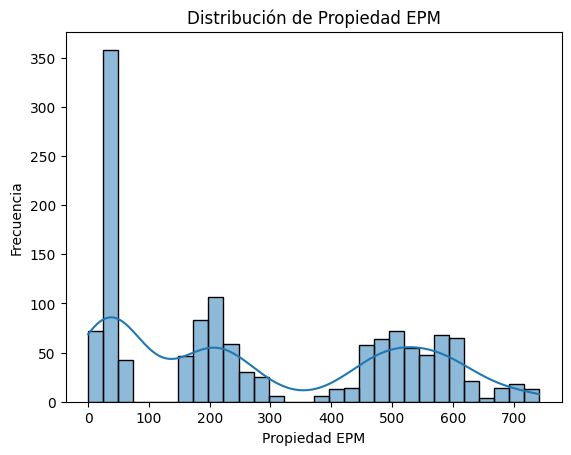

In [16]:
sns.histplot(df_tarifas_cleaned['Propiedad Epm'], kde=True, bins=30)
plt.title('Distribución de Propiedad EPM')
plt.xlabel('Propiedad EPM')
plt.ylabel('Frecuencia')
plt.show()


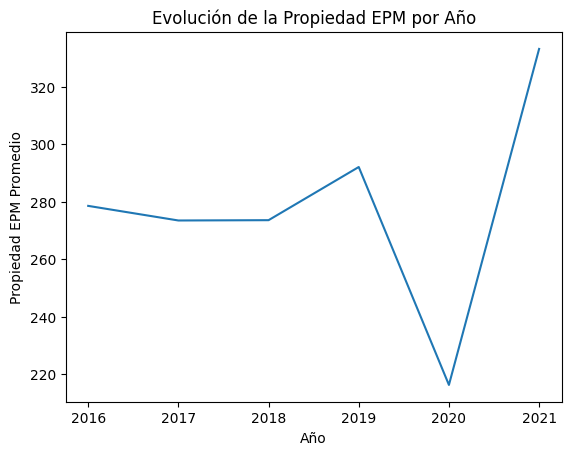

In [17]:
tarifas_por_ano = df_tarifas_cleaned.groupby('Año').agg({
    'Propiedad Epm': 'mean',
    'Compartido': 'mean',
    'Propiedad del Cliente': 'mean',
    'Punta': 'mean',
    'Fuera de Punta': 'mean'
}).reset_index()

sns.lineplot(x='Año', y='Propiedad Epm', data=tarifas_por_ano)
plt.title('Evolución de la Propiedad EPM por Año')
plt.xlabel('Año')
plt.ylabel('Propiedad EPM Promedio')
plt.show()


In [18]:
df_tarifas

,Tipo de Información,Tipo de Tarifa,Tipo de Dato,Rango de Consumo,Nivel,Propiedad Epm,Compartido,Propiedad del Cliente,Punta,Fuera de Punta,Año,Mes
0,Monomia,Residencial,Estrato 1,Rango 0 - CS,I,228.08,218.81,209.54,0.00,0.00,2020.0,Diciembre
1,Monomia,Residencial,Estrato 1,Rango > CS,I,570.20,547.02,523.85,0.00,0.00,2020.0,Diciembre
2,Monomia,Residencial,Estrato 2,Rango 0 - CS,I,285.10,273.51,261.92,0.00,0.00,2020.0,Diciembre
3,Monomia,Residencial,Estrato 2,Rango > CS,I,570.20,547.02,523.85,0.00,0.00,2020.0,Diciembre
4,Monomia,Residencial,Estrato 3,Rango 0 - CS,I,484.67,464.97,445.27,0.00,0.00,2020.0,Diciembre
...,...,...,...,...,...,...,...,...,...,...,...,...
3618,Horaria,Costo Unitario,"Costo G, T, pérdidas: PRn,m",Fuera de Punta,I,48.85,48.85,48.85,0.00,0.00,2020.0,Noviembre
3619,Horaria,Costo Unitario,Restricciones: Rm,Fuera de Punta,I,27.10,27.10,27.10,0.00,0.00,2020.0,Noviembre
3620,Horaria,No residencial,Oficial y Exentos,Punta,I,568.78,545.72,522.66,0.00,0.00,2020.0,Noviembre
3621,Horaria,No residencial,Oficial y Exentos,Fuera de Punta,I,567.17,544.11,521.05,0.00,0.00,2020.0,Noviembre


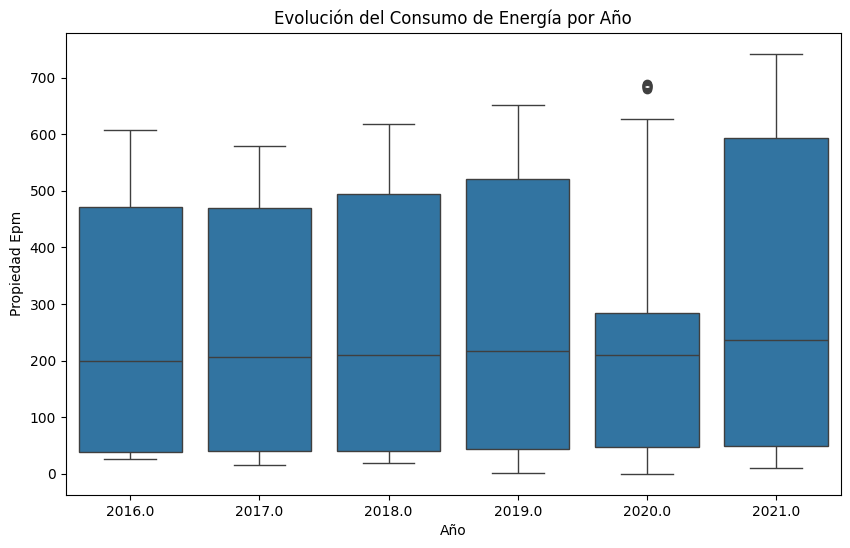

In [20]:
# Evolución del consumo por Año
plt.figure(figsize=(10,6))
sns.boxplot(x='Año', y='Propiedad Epm', data=df_tarifas_cleaned)
plt.title('Evolución del Consumo de Energía por Año')
plt.show()


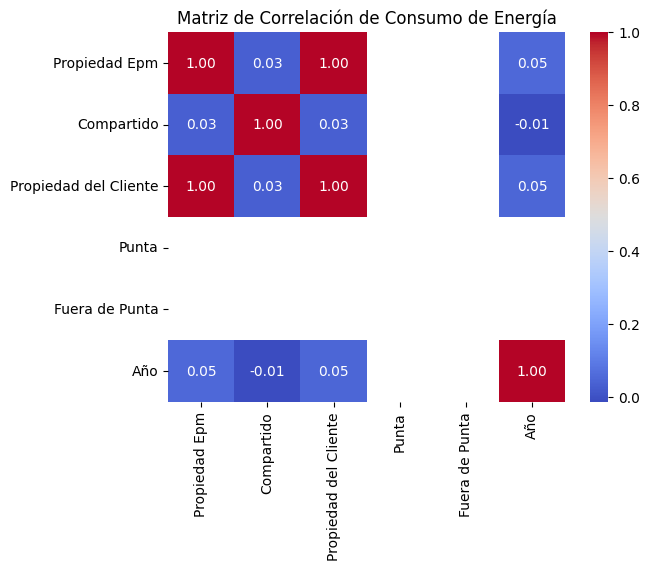

In [21]:
# Análisis de correlación entre las variables numéricas
correlation_matrix = df_tarifas_cleaned[['Propiedad Epm', 'Compartido', 'Propiedad del Cliente', 'Punta', 'Fuera de Punta', 'Año']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación de Consumo de Energía')
plt.show()


In [27]:
# Reemplazar los valores de 'Rango de Consumo'
df_tarifas_cleaned['Rango de Consumo'] = df_tarifas_cleaned['Rango de Consumo'].replace({
    'Rango 0 - CS': 'Rango Bajo de Consumo (Subsidiado)',
    'Rango > CS': 'Rango Alto de Consumo (No Subsidiado)'
})

# Reemplazar los valores de 'Punta' y 'Fuera de Punta'
df_tarifas_cleaned['Punta'] = df_tarifas_cleaned['Punta'].replace({
    0: 'Horas de Baja Demanda (Fuera de Punta)',
    1: 'Horas de Alta Demanda (Punta)'
})

df_tarifas_cleaned['Fuera de Punta'] = df_tarifas_cleaned['Fuera de Punta'].replace({
    0: 'Horas de Alta Demanda (Punta)',
    1: 'Horas de Baja Demanda (Fuera de Punta)'
})

# Verificar los cambios realizados
print(df_tarifas_cleaned.head())


  Tipo de Información Tipo de Tarifa Tipo de Dato  \
0             Monomia    residencial    Estrato 1   
1             Monomia    residencial    Estrato 1   
2             Monomia    residencial    Estrato 2   
3             Monomia    residencial    Estrato 2   
4             Monomia    residencial    Estrato 3   

                        Rango de Consumo Nivel  Propiedad Epm  Compartido  \
0     Rango Bajo de Consumo (Subsidiado)     I         228.08      218.81   
1  Rango Alto de Consumo (No Subsidiado)     I         570.20      547.02   
2     Rango Bajo de Consumo (Subsidiado)     I         285.10      273.51   
3  Rango Alto de Consumo (No Subsidiado)     I         570.20      547.02   
4     Rango Bajo de Consumo (Subsidiado)     I         484.67      464.97   

   Propiedad del Cliente                                   Punta  \
0                 209.54  Horas de Baja Demanda (Fuera de Punta)   
1                 523.85  Horas de Baja Demanda (Fuera de Punta)   
2             

<ipython-input-39-00acac5b79b5>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=consumo_counts.index, x=consumo_counts.values, palette='Blues_d')


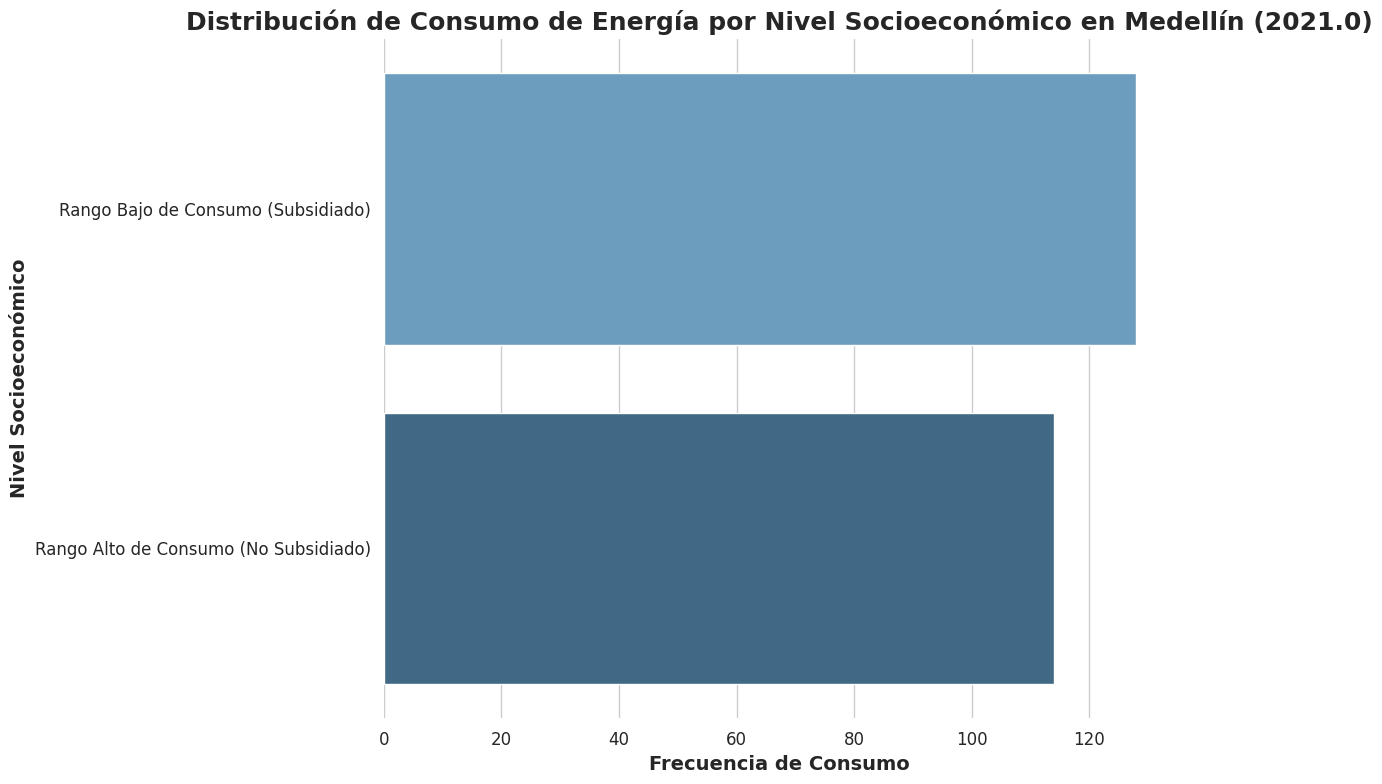

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un diccionario de reemplazo
reemplazo_rangos = {
    'Rango 0 - CS': 'Rango Bajo de Consumo (Subsidiado)',
    'Rango > CS': 'Rango Alto de Consumo (No Subsidiado)',
    'Punta': 'Consumo Durante Horas Pico',
    'Fuera de Punta': 'Consumo Fuera de Horas Pico',
    'Todo el consumo': 'Consumo Total',
}

# Reemplazar los términos en la columna 'Rango de Consumo'
df_tarifas_cleaned['Rango de Consumo'] = df_tarifas_cleaned['Rango de Consumo'].replace(reemplazo_rangos)

# Filtrar las filas que contienen las categorías relacionadas con el nivel socioeconómico
df_filtrado = df_tarifas_cleaned[df_tarifas_cleaned['Rango de Consumo'].isin([
    'Rango Bajo de Consumo (Subsidiado)',
    'Rango Alto de Consumo (No Subsidiado)'
])]

# Obtener la fecha más común en el dataset para mostrarla en el título
año_datos = df_filtrado['Año'].mode()[0]

# Contar la frecuencia de cada rango de consumo
consumo_counts = df_filtrado['Rango de Consumo'].value_counts()

# Crear el gráfico de barras con los ejes invertidos y mejorar la estética
plt.figure(figsize=(12, 8))
sns.barplot(y=consumo_counts.index, x=consumo_counts.values, palette='Blues_d')

# Estilizar el gráfico con detalles estéticos
plt.title(f'Distribución de Consumo de Energía por Nivel Socioeconómico en Medellín ({año_datos})', fontsize=18, fontweight='bold')
plt.ylabel('Nivel Socioeconómico', fontsize=14, fontweight='bold')
plt.xlabel('Frecuencia de Consumo', fontsize=14, fontweight='bold')
plt.yticks(rotation=0, fontsize=12)
plt.xticks(fontsize=12)

# Ajustar el estilo de las barras
sns.despine(left=True, bottom=True)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


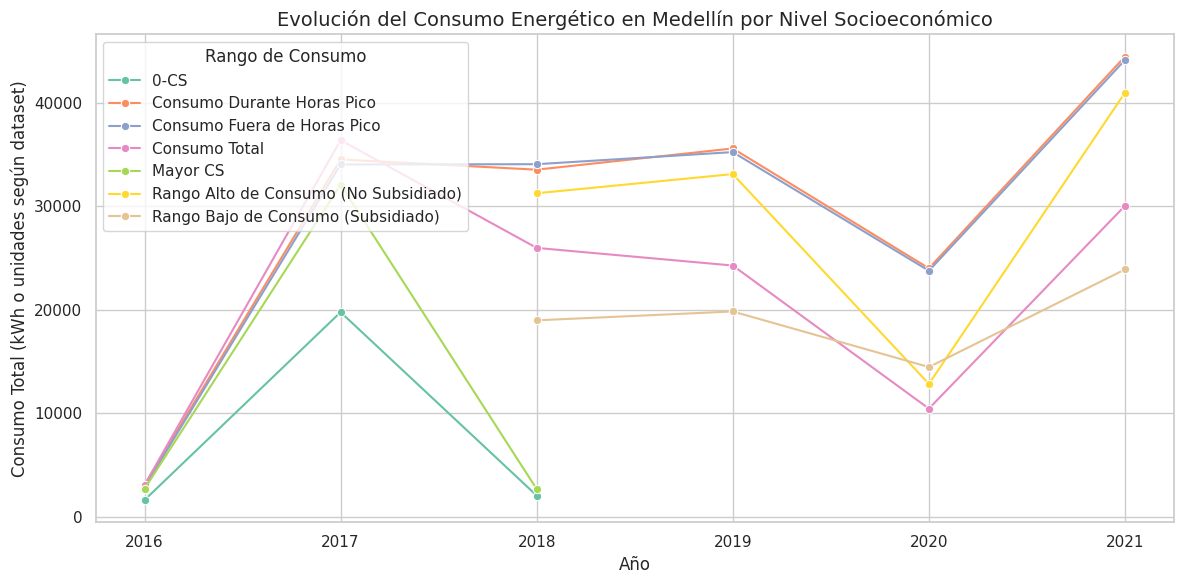

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupar por año y rango de consumo, y sumar el consumo total
consumo_anual = df_tarifas_cleaned.groupby(['Año', 'Rango de Consumo'])[['Propiedad Epm', 'Propiedad del Cliente']].sum()
consumo_anual['Consumo Total'] = consumo_anual['Propiedad Epm'] + consumo_anual['Propiedad del Cliente']
consumo_anual = consumo_anual.reset_index()

# Gráfico
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=consumo_anual,
    x='Año',
    y='Consumo Total',
    hue='Rango de Consumo',
    marker='o',
    palette='Set2'
)

# Personalización del gráfico
plt.title('Evolución del Consumo Energético en Medellín por Nivel Socioeconómico', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Consumo Total (kWh o unidades según dataset)', fontsize=12)
plt.legend(title='Rango de Consumo', loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Asegúrate de que las columnas de consumo estén en el formato adecuado
df_tarifas['Consumo'] = pd.to_numeric(df_tarifas['Consumo'], errors='coerce')

# Agrupar por tipo de tarifa y calcular la suma de consumo en Punta y Fuera de Punta
df_agrupado = df_tarifas.groupby(['Tipo de Tarifa'])[['Punta', 'Fuera de Punta', 'Consumo']].sum()

# Crear un gráfico de barras para visualizar la comparación de consumo
df_agrupado[['Punta', 'Fuera de Punta']].plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Consumo Energético por Tipo de Tarifa y Periodos (Punta vs Fuera de Punta)')
plt.xlabel('Tipo de Tarifa')
plt.ylabel('Consumo Energético')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


KeyError: 'Consumo'

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'Cargo por consumo ($/kWh)' is the intended column for consumption
df_tarifas['Consumo'] = pd.to_numeric(df_tarifas['Cargo por consumo ($/kWh)'], errors='coerce')

# Agrupar por tipo de tarifa y calcular la suma de consumo en Punta y Fuera de Punta
df_agrupado = df_tarifas.groupby(['Tipo de Tarifa'])[['Punta', 'Fuera de Punta', 'Consumo']].sum()

# Crear un gráfico de barras para visualizar la comparación de consumo
df_agrupado[['Punta', 'Fuera de Punta']].plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Consumo Energético por Tipo de Tarifa y Periodos (Punta vs Fuera de Punta)')
plt.xlabel('Tipo de Tarifa')
plt.ylabel('Consumo Energético')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

KeyError: 'Cargo por consumo ($/kWh)'

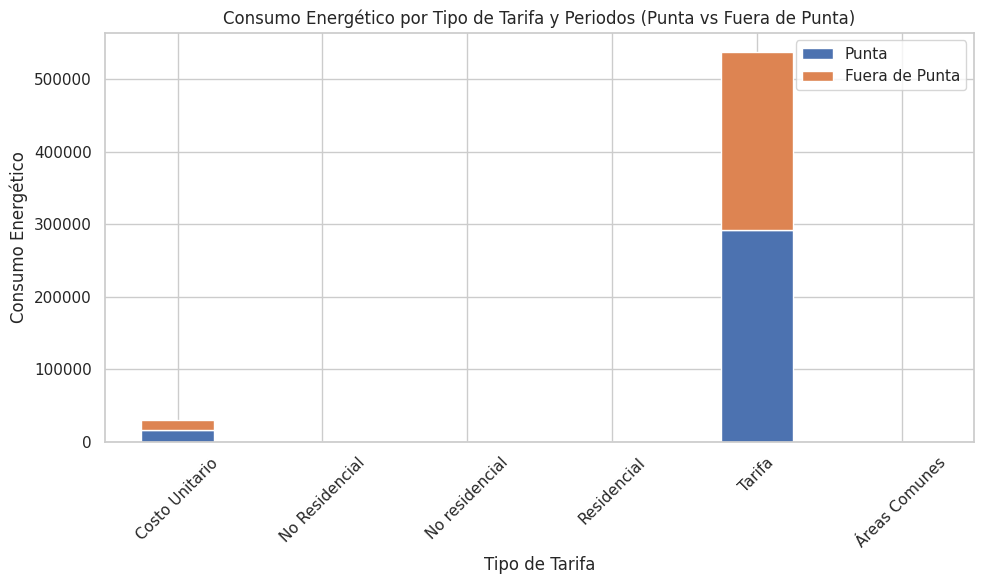

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Asegúrate de que las columnas de Punta y Fuera de Punta estén en el formato adecuado
df_tarifas['Punta'] = pd.to_numeric(df_tarifas['Punta'], errors='coerce')
df_tarifas['Fuera de Punta'] = pd.to_numeric(df_tarifas['Fuera de Punta'], errors='coerce')

# Crear una columna "Consumo Total" sumando Punta y Fuera de Punta
df_tarifas['Consumo Total'] = df_tarifas['Punta'] + df_tarifas['Fuera de Punta']

# Agrupar por tipo de tarifa y calcular la suma de consumo en Punta y Fuera de Punta
df_agrupado = df_tarifas.groupby(['Tipo de Tarifa'])[['Punta', 'Fuera de Punta', 'Consumo Total']].sum()

# Crear un gráfico de barras para visualizar la comparación de consumo
df_agrupado[['Punta', 'Fuera de Punta']].plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Consumo Energético por Tipo de Tarifa y Periodos (Punta vs Fuera de Punta)')
plt.xlabel('Tipo de Tarifa')
plt.ylabel('Consumo Energético')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


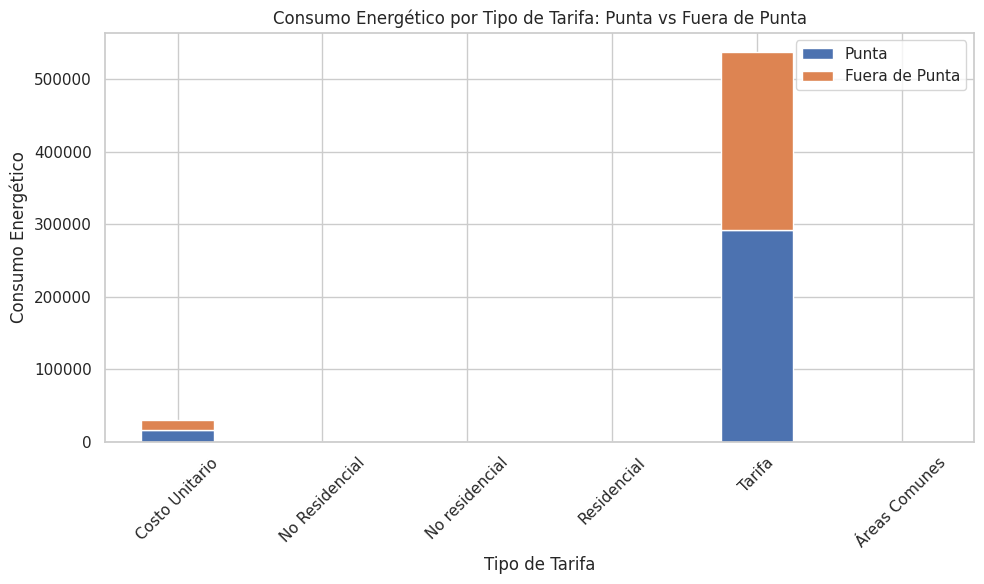

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Asegúrate de que las columnas de Punta y Fuera de Punta estén en el formato adecuado
df_tarifas['Punta'] = pd.to_numeric(df_tarifas['Punta'], errors='coerce')
df_tarifas['Fuera de Punta'] = pd.to_numeric(df_tarifas['Fuera de Punta'], errors='coerce')

# Agrupar por tipo de tarifa y calcular la suma de consumo en Punta y Fuera de Punta
df_agrupado = df_tarifas.groupby(['Tipo de Tarifa'])[['Punta', 'Fuera de Punta']].sum()

# Crear un gráfico de barras para visualizar la comparación de consumo en Punta y Fuera de Punta por tipo de tarifa
df_agrupado.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Consumo Energético por Tipo de Tarifa: Punta vs Fuera de Punta')
plt.xlabel('Tipo de Tarifa')
plt.ylabel('Consumo Energético')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [52]:
# Promedio de consumo en Punta
promedio_punta = df_tarifas['Punta'].mean()

# Promedio de consumo en Fuera de Punta
promedio_fuera_punta = df_tarifas['Fuera de Punta'].mean()

# Mostrar los promedios
print(f'Promedio de Consumo en Punta: {promedio_punta}')
print(f'Promedio de Consumo en Fuera de Punta: {promedio_fuera_punta}')


Promedio de Consumo en Punta: 84.9906239646604
Promedio de Consumo en Fuera de Punta: 71.45497239094423


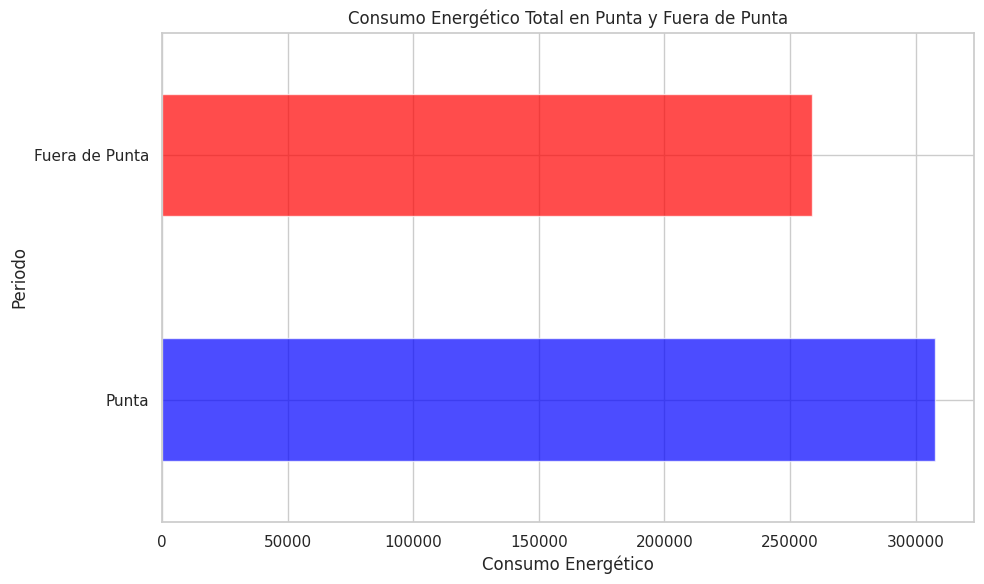

In [57]:
# Crear un gráfico de barras horizontales para comparar el consumo
df_agrupado = df_tarifas[['Punta', 'Fuera de Punta']].sum()

# Gráfico de barras horizontales
plt.figure(figsize=(10, 6))
df_agrupado.plot(kind='barh', color=['blue', 'red'], alpha=0.7)
plt.title('Consumo Energético Total en Punta y Fuera de Punta')
plt.xlabel('Consumo Energético')
plt.ylabel('Periodo')
plt.tight_layout()
plt.show()


In [58]:
import pandas as pd

# Si ya tienes el dataframe cargado como df_tarifas, simplemente lo usas
# df_tarifas = pd.read_csv('ruta_a_tu_archivo.csv')  # Si lo tienes en un archivo CSV

# Obtener los años únicos presentes en la columna 'Año'
años_unicos = df_tarifas['Año'].unique()

# Mostrar los años únicos encontrados
print("Años presentes en el dataset:", años_unicos)


Años presentes en el dataset: [2020. 2021. 2018. 2019. 2017.   nan 2016.]


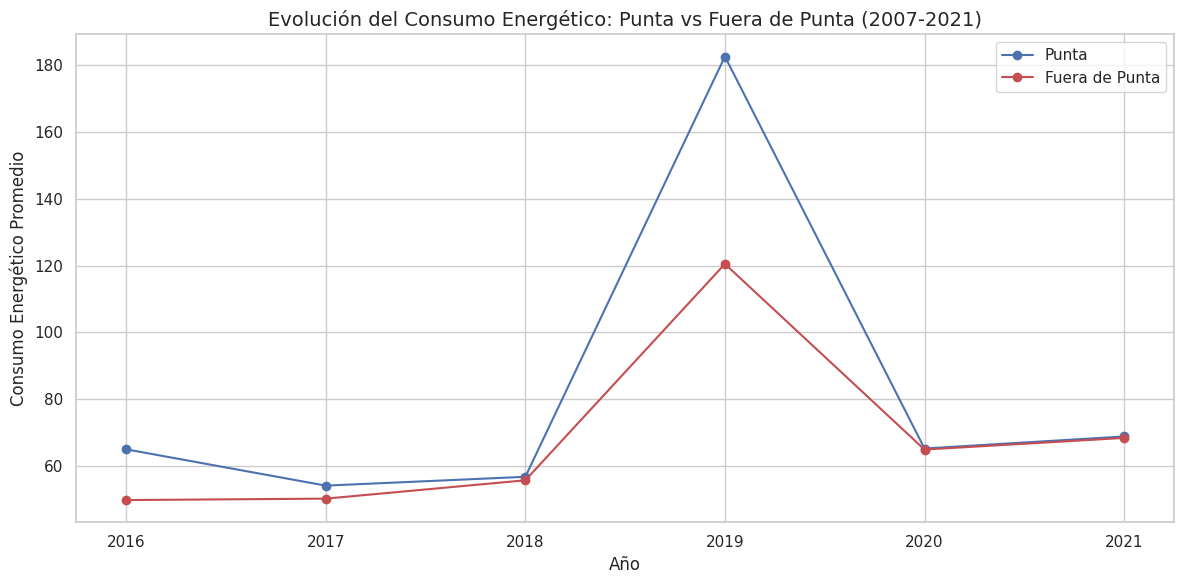

In [59]:
import matplotlib.pyplot as plt
import pandas as pd

# Agrupar los datos por año y calcular la media de Punta y Fuera de Punta por año
df_agrupado_por_ano = df_tarifas.groupby('Año')[['Punta', 'Fuera de Punta']].mean()

# Crear el gráfico de líneas
plt.figure(figsize=(12, 6))
plt.plot(df_agrupado_por_ano.index, df_agrupado_por_ano['Punta'], label='Punta', marker='o', color='b')
plt.plot(df_agrupado_por_ano.index, df_agrupado_por_ano['Fuera de Punta'], label='Fuera de Punta', marker='o', color='r')

# Añadir detalles al gráfico
plt.title('Evolución del Consumo Energético: Punta vs Fuera de Punta (2007-2021)', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Consumo Energético Promedio', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
